# ![#c5f015](https://via.placeholder.com/15/c5f015/000000?text=+) **NLP Research<br>Bert Relation Extraction in Biomedical using Biobert model and pytorch**
## <img src="https://img.icons8.com/external-fauzidea-flat-fauzidea/64/undefined/external-man-avatar-avatar-fauzidea-flat-fauzidea.png"/> **`Dimas Dwi Putra`**

# <img src="https://img.icons8.com/color/48/undefined/1-circle--v1.png"/>**Connect Google Storage**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <img src="https://img.icons8.com/color/48/undefined/2-circle--v1.png"/>**Requirements**

In [ ]:
# ! pip install pandas==1.4.2
# ! pip install matplotlib==3.5.1
! pip install openpyxl==3.0.9
# ! pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
! pip install transformers==4.18.0
! pip install scikit-learn==1.0.2
! pip install pickleshare==0.7.5
! pip install pickle5==0.0.12

# <img src="https://img.icons8.com/color/48/undefined/3-circle--v1.png"/>**Check Device**

In [ ]:
import torch

USE_CUDA = torch.cuda.is_available()

if USE_CUDA:
    device = torch.device("cuda")
    print("\nUsing GPU")
    print('\nDevice name:', torch.cuda.get_device_name(0))
else:
    print("\nNo GPU available, using the CPU instead.")


Using GPU

Device name: Tesla T4


# <img src="https://img.icons8.com/color/48/undefined/4-circle--v1.png"/>**Data Preprocessing into `train set` and `test set`**

In [ ]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/data_preprocessing.py"

Negative                583
Treatment_of_disease    507
Cause_of_disease        183
Association              34
Name: relation, dtype: int64
total data : 1307

success to create predict.txt
success to create train.txt
success to create test.txt


# <img src="https://img.icons8.com/color/48/undefined/5-circle--v1.png"/>**Preprocess Program**
### **preprocess data with special token using `biobert pretrained model`**

In [ ]:
! bash "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_preprocess.sh"

{'output_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/', 'bert_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/model/Biobert/', 'data_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/', 'log_dir': 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/', 'num_tags': 4, 'seed': 123, 'gpu_ids': '0', 'max_seq_len': 128, 'eval_batch_size': 2, 'swa_start': 3, 'train_epochs': 75, 'dropout_prob': 0.8, 'lr': 1e-05, 'other_lr': 0.0001, 'max_grad_norm': 1, 'warmup_proportion': 0.1, 'weight_decay': 0.01, 'adam_epsilon': 1e-12, 'train_batch_size': 2, 'eval_model': True}
example_text : Halothane is known to oppose <e1start> digitalis <e1end>-induced <e2start> ventricular arrhythmias <e2end>. 
example_id_label : 0
example_id_tags : [29, 56, 65, 106]
example_text : Both cases proved to be <e1start> cotton <e1end>-material-induced <e2start> granulomas <e2end>. 
example_id_label : 0
example_id_tags : [24, 48, 66, 94]


# <img src="https://img.icons8.com/color/48/undefined/6-circle--v1.png"/>**Main Program**
### **`train`, `eval`, create new `model pytorch`, test model , <br>compute `cross validation`, `f-1 score`, and <br>test predict data with new model `.pt`**

In [ ]:
f_run_main = open("/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_main.sh", "r")
print(f_run_main.read())

#!/usr/bin/env bash
python "drive/MyDrive/Colab Notebooks/bert_relation_extraction/main.py" \
--bert_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/model/Biobert/" \
--data_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/input/data/" \
--log_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/logs/" \
--output_dir="drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint/" \
--num_tags=4 \
--seed=123 \
--gpu_ids="0" \
--max_seq_len=128 \
--lr=1e-5 \
--other_lr=1e-4 \
--train_batch_size=2 \
--train_epochs=75 \
--eval_batch_size=2 \
--dropout_prob=0.8 \


In [ ]:
! bash "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_main.sh"

Output streaming akan dipotong hingga 5000 baris terakhir.
torch.Size([2, 4, 768])
torch.Size([1, 4, 768])
【dev】 loss：13.261079 accuracy：0.5455 micro_f1：0.5455 macro_f1：0.6083
torch.Size([2, 4, 768])
【train】 epoch：50 step:1172/1725 loss：0.006138
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([1, 4, 768])
【dev】 loss：12.992808 accuracy：0.5455 micro_f1：0.5455 macro_f1：0.6083
torch.Size([2, 4, 768])
【train】 epoch：51 step:1173/1725 loss：0.022178
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([1, 4, 768])
【dev】 loss：12.832147 accuracy：0.5455 micro_f1：0.5455 macro_f1：0.6083
torch.Size([2, 4, 768])
【train】 epoch：51 step:1174/1725 loss：0.025977
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([2, 4, 768])
torch.Size([1, 4, 768])
【dev】 loss：12.790958 accuracy：0.5455 micro_f

In [ ]:
! bash "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/run_demo.sh"

{'Cause_of_disease': 0, 'Treatment_of_disease': 1, 'Negative': 2, 'Association': 3}
======== Prediction ========
Halothane is known to oppose <e1start> digitalis <e1end>-induced <e2start> ventricular arrhythmias <e2end>. 
torch.Size([1, 4, 768])
predict labels：Cause_of_disease
true label：Cause_of_disease
Both cases proved to be <e1start> cotton <e1end>-material-induced <e2start> granulomas <e2end>. 
torch.Size([1, 4, 768])
predict labels：Cause_of_disease
true label：Cause_of_disease
The evidence for <e1start> soybean <e1end> products as <e2start> cancer <e2end> preventive agents.  
torch.Size([1, 4, 768])
predict labels：Treatment_of_disease
true label：Treatment_of_disease
[Mortality trends in <e2start> cancer <e2end> attributable to <e1start> tobacco <e1end> in Mexico].  
torch.Size([1, 4, 768])
predict labels：Association
true label：Cause_of_disease
<e1start> Areca <e1end> nut chewing has a significant association with <e2start> systemic inflammation <e2end>.
torch.Size([1, 4, 768])
pre

# <img src="https://img.icons8.com/color/48/undefined/7-circle--v1.png"/>**Summary**

### ***Train Output***

In [2]:
import pandas as pd
import csv

url = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-train.csv'

biobert_train = pd.read_csv(url)

print(biobert_train)

                     Time  Epoch  Step      Loss
0     2022-06-06 18:01:59      0     0  2.566099
1     2022-06-06 18:02:05      0     1  2.137553
2     2022-06-06 18:02:05      0     2  1.132333
3     2022-06-06 18:02:11      0     3  0.964150
4     2022-06-06 18:02:11      0     4  1.834854
...                   ...    ...   ...       ...
1720  2022-06-06 18:12:14     74  1720  0.002389
1721  2022-06-06 18:12:15     74  1721  0.002441
1722  2022-06-06 18:12:15     74  1722  0.013574
1723  2022-06-06 18:12:15     74  1723  0.007569
1724  2022-06-06 18:12:16     74  1724  0.013490

[1725 rows x 4 columns]


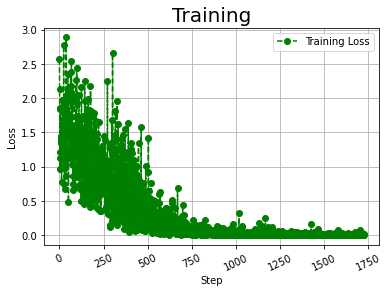

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

x = []
y = []

with open(url, 'r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(int(row[2]))
        y.append(float(row[3]))

plt.plot(x, y, color='g', linestyle='dashed',
         marker='o', label="Training Loss")

plt.xticks(rotation=25)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [6]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-train-chart.py"

### ***Dev Output***

In [3]:
dev_url = 'drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-dev.csv'

biobert_dev = pd.read_csv(dev_url)

print(biobert_dev)

                     Time       Loss  accuracy  micro_f1  macro_f1
0     2022-06-06 18:01:59   8.110209    0.4545    0.4545    0.3250
1     2022-06-06 18:02:05   8.117139    0.4545    0.4545    0.3250
2     2022-06-06 18:02:05   8.161147    0.4545    0.4545    0.4262
3     2022-06-06 18:02:11   8.228177    0.3636    0.3636    0.3625
4     2022-06-06 18:02:11   8.259426    0.2727    0.2727    0.2556
...                   ...        ...       ...       ...       ...
1720  2022-06-06 18:12:14  13.846020    0.4545    0.4545    0.5444
1721  2022-06-06 18:12:15  13.986821    0.4545    0.4545    0.5444
1722  2022-06-06 18:12:15  14.046444    0.4545    0.4545    0.5444
1723  2022-06-06 18:12:15  14.099108    0.4545    0.4545    0.5444
1724  2022-06-06 18:12:16  14.115695    0.4545    0.4545    0.5444

[1725 rows x 5 columns]


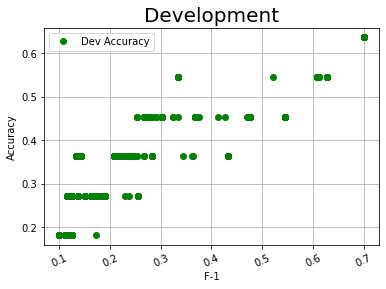

In [7]:
dev_x = []
dev_y = []

with open(dev_url, 'r') as dev_csvfile:
    dev_lines = csv.reader(dev_csvfile, delimiter=',')
    for dev_row in dev_lines:
        dev_x.append(float(dev_row[4]))
        dev_y.append(float(dev_row[2]))

plt.plot(dev_x, dev_y, color='g', linestyle='None',
         marker='o', label="Dev Accuracy")

plt.xticks(rotation=25)
plt.xlabel('F-1')
plt.ylabel('Accuracy')
plt.title('Development', fontsize=20)
plt.grid()
plt.legend()
plt.show()

In [8]:
! python "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/visualization/biobert-dev-chart.py"

### ***Training, Validation, Test***

```
2022-06-06 18:12:00,009 - INFO - main.py - train - 86 - 【train】 epoch：73 step:1693/1725 loss：0.003538
2022-06-06 18:12:00,267 - INFO - main.py - train - 92 - 【dev】 loss：12.885095 accuracy：0.6364 micro_f1：0.6364 macro_f1：0.7000
2022-06-06 18:12:00,268 - INFO - main.py - train - 94 - ------------>Save best model
...
2022-06-06 18:12:16,443 - INFO - main.py - <module> - 247 - ======== Calculate Testing========
2022-06-06 18:12:18,922 - INFO - main.py - <module> - 251 - 【test】 loss：12.885095 accuracy：0.6364 micro_f1：0.6364 macro_f1：0.7000
```

```
                        precision    recall  per-class   support
                                             f1-scores

    Cause_of_disease       0.50       0.75      0.60         4
Treatment_of_disease       0.50       0.33      0.40         3
            Negative       1.00       0.67      0.80         3
         Association       1.00       1.00      1.00         1

```

<br>
<center>
<img src="https://img.icons8.com/external-royyan-wijaya-detailed-outline-royyan-wijaya/24/undefined/external-arrow-arrow-line-royyan-wijaya-detailed-outline-royyan-wijaya-8.png"/>
</center>
<br>

```
                          precision    recall    Average     support
                                                f1-scores

            accuracy                              0.64         11
           macro avg         0.75       0.69      0.70         11
        weighted avg         0.68       0.64      0.64         11
```

### **Model Output**

In [9]:
! ls -lh "/content/drive/MyDrive/Colab Notebooks/bert_relation_extraction/output/checkpoint"

total 2.5G
-rw------- 1 root root 1.3G Jun  6 18:14 best-Biobert.pt
-rw------- 1 root root 1.3G Jun  6 17:51 best-BiomedNLP-PubMedBERT.pt


# <img src="https://img.icons8.com/color-glass/48/undefined/code.png"/> **Source Code on** [**Gitlab**](https://gitlab.com/research.dimas/nlp_bert_relation_extraction/) <img src="https://img.icons8.com/color/48/undefined/gitlab.png"/>
# ![#f03c15](https://via.placeholder.com/15/f03c15/000000?text=+) [**NLP - Bert Relation Extraction Biomedical**](https://gitlab.com/research.dimas/nlp_bert_relation_extraction/)

<br><br><br>
# "*Alone we can do so little, together we can do so much*"